In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [34]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, walk_through_dir, unzip

In [35]:
walk_through_dir("10_food_classes_10_percent")

10_food_classes_10_percent 디렉토리에는 2개의 디렉토리가 존재하고 0개의 파일이 존재합니다.
10_food_classes_10_percent\test 디렉토리에는 10개의 디렉토리가 존재하고 0개의 파일이 존재합니다.
10_food_classes_10_percent\test\chicken_curry 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\chicken_wings 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\fried_rice 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\grilled_salmon 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\hamburger 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\ice_cream 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\pizza 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\ramen 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\steak 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\test\sushi 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_10_percent\train 디렉토리에는 10개의 디렉토리가 존재하고 0개

In [36]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [37]:
# 어제는 ImageDataGenerator로 데이터를 준비 => 데이터셋이 generator형식
# 오늘은 tf.keras.preprocesing.image_dataset_from_directory()로 데이터를 준비 => tf.data.Dataset 형식
# tf.data.Dataset API 방식이 ImageDataGenerator API 방식보다 더 효율적이다!

IMG_SIZE = (224, 224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    image_size = IMG_SIZE,
    label_mode = "categorical",
    batch_size = 32
)

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    image_size = IMG_SIZE,
    label_mode = "categorical"
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [38]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [39]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [40]:
for images, labels in train_data_10_percent.take(1):
    print(images, labels)

tf.Tensor(
[[[[1.07632652e+02 1.32586731e+02 1.50887756e+02]
   [1.06045921e+02 1.32045914e+02 1.47188766e+02]
   [1.08632652e+02 1.34479584e+02 1.47403061e+02]
   ...
   [2.20714512e+01 2.30714512e+01 2.78571873e+01]
   [2.02857151e+01 1.92857151e+01 2.52857151e+01]
   [2.10000343e+01 2.00000343e+01 2.60000343e+01]]

  [[1.05836739e+02 1.26862244e+02 1.41362244e+02]
   [1.07443878e+02 1.30443878e+02 1.46443878e+02]
   [1.07632660e+02 1.34959183e+02 1.51617355e+02]
   ...
   [2.38010406e+01 2.48010406e+01 2.95867767e+01]
   [2.19336605e+01 2.09336605e+01 2.69336605e+01]
   [2.14286060e+01 2.04286060e+01 2.64286060e+01]]

  [[1.09709183e+02 1.28275513e+02 1.43071426e+02]
   [1.09040817e+02 1.35954086e+02 1.53709183e+02]
   [1.17709190e+02 1.53489792e+02 1.76775513e+02]
   ...
   [2.47398224e+01 2.57398224e+01 3.05255585e+01]
   [2.51428452e+01 2.41428452e+01 3.01428452e+01]
   [2.42142868e+01 2.32142868e+01 2.92142868e+01]]

  ...

  [[2.31642853e+02 2.23642853e+02 2.12642853e+02]
   [2

In [41]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name = "input_layer")

x = base_model(inputs)
x.shape


TensorShape([None, 7, 7, 1280])

In [42]:
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
x.shape

TensorShape([None, 1280])

In [43]:
outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)
model_0 = tf.keras.Model(inputs, outputs)
# 지금까지 모델을 생성한 방법 keras에서 모델을 정의할 때 (create)사용하는 방법 2번째
# fuctional method

In [44]:
model_0.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [45]:
history_10_percent = model_0.fit(
    train_data_10_percent,
    epochs = 5,
    validation_data = test_data_10_percent,
    callbacks = [create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")]
)

TensorBoard log 파일들은 transfer_learning/10_percent_feature_extract/20211102-223105에 저장했습니다.
Epoch 1/5
24/24 [==============================] - 74s 3s/step - loss: 1.8796 - accuracy: 0.4320 - val_loss: 1.3451 - val_accuracy: 0.7160
Epoch 2/5
24/24 [==============================] - 71s 3s/step - loss: 1.1267 - accuracy: 0.7653 - val_loss: 0.9201 - val_accuracy: 0.7896
Epoch 3/5
24/24 [==============================] - 72s 3s/step - loss: 0.8324 - accuracy: 0.8093 - val_loss: 0.7522 - val_accuracy: 0.8164
Epoch 4/5
24/24 [==============================] - 75s 3s/step - loss: 0.6819 - accuracy: 0.8453 - val_loss: 0.6629 - val_accuracy: 0.8312
Epoch 5/5
24/24 [==============================] - 78s 3s/step - loss: 0.5804 - accuracy: 0.8680 - val_loss: 0.6092 - val_accuracy: 0.8368


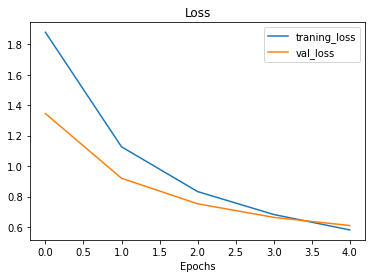

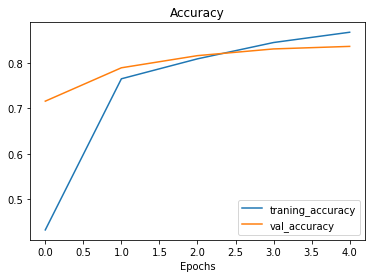

In [46]:
plot_loss_curves(history_10_percent)

In [47]:
# feature extraction transfer learning을 지금까지 경험해 보았습니다.
# feature extraction => 사전에 학습된 모델에 우리만의 데이터를 전달해서 "너는 분류를 잘 하다면서... 그럼 무슨 패턴이 보여?"
# 보이면 내가 그건에 대해서 알려줄게 => output layer를 우리가 전달

In [48]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_3
1 rescaling_2
2 normalization_2
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_d

In [49]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, None, None, 3 7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization_2[0][0]            
_____________________________________________________________________________________

In [50]:
model_0.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [51]:
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
input_tensor

<tf.Tensor: shape=(1, 4, 4, 3), dtype=float32, numpy=
array([[[[ 0.3274685 , -0.8426258 ,  0.3194337 ],
         [-1.4075519 , -2.3880599 , -1.0392479 ],
         [-0.5573232 ,  0.539707  ,  1.6994323 ],
         [ 0.28893656, -1.5066116 , -0.26454744]],

        [[-0.59722406, -1.9171132 , -0.62044144],
         [ 0.8504023 , -0.40604794, -3.0258412 ],
         [ 0.9058464 ,  0.29855987, -0.22561555],
         [-0.7616443 , -1.891714  , -0.9384712 ]],

        [[ 0.77852213, -0.47338897,  0.97772694],
         [ 0.24694404,  0.20573747, -0.5256233 ],
         [ 0.32410017,  0.02545409, -0.10638497],
         [-0.6369475 ,  1.1603122 ,  0.2507359 ]],

        [[-0.41728497,  0.40125778, -1.4145442 ],
         [-0.59318566, -1.6617213 ,  0.33567193],
         [ 0.10815629,  0.2347968 , -0.56668764],
         [-0.35819843,  0.88698626,  0.5274477 ]]]], dtype=float32)>

In [52]:
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
global_average_pooled_tensor

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [53]:
tf.reduce_mean(input_tensor, axis = [1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [54]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name = "input_layer")

x = base_model(inputs)
x.shape

TensorShape([None, 7, 7, 1280])

In [55]:
x = tf.keras.layers.GlobalMaxPooling2D(name = "global_max_pooling_layer")(x)
x.shape

TensorShape([None, 1280])

In [56]:
outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)
model_0_max = tf.keras.Model(inputs, outputs)

In [57]:
model_0_max.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [58]:
history_10_percent_max = model_0_max.fit(
    train_data_10_percent,
    epochs = 5,
    validation_data = test_data_10_percent,
    callbacks = [create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")]
)

TensorBoard log 파일들은 transfer_learning/10_percent_feature_extract/20211102-224121에 저장했습니다.
Epoch 1/5
24/24 [==============================] - 77s 3s/step - loss: 3.6455 - accuracy: 0.2240 - val_loss: 1.9734 - val_accuracy: 0.4644
Epoch 2/5
24/24 [==============================] - 76s 3s/step - loss: 1.5436 - accuracy: 0.5907 - val_loss: 1.3387 - val_accuracy: 0.6248
Epoch 3/5
24/24 [==============================] - 74s 3s/step - loss: 1.0394 - accuracy: 0.7027 - val_loss: 1.2847 - val_accuracy: 0.6624
Epoch 4/5
24/24 [==============================] - 76s 3s/step - loss: 0.7599 - accuracy: 0.7733 - val_loss: 1.0570 - val_accuracy: 0.6968
Epoch 5/5
24/24 [==============================] - 77s 3s/step - loss: 0.5961 - accuracy: 0.8013 - val_loss: 0.9970 - val_accuracy: 0.7236


In [33]:
unzip("10_food_classes_1_percent.zip")

In [34]:
walk_through_dir("10_food_classes_1_percent")

10_food_classes_1_percent 디렉토리에는 2개의 디렉토리가 존재하고 0개의 파일이 존재합니다.
10_food_classes_1_percent\test 디렉토리에는 10개의 디렉토리가 존재하고 0개의 파일이 존재합니다.
10_food_classes_1_percent\test\chicken_curry 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\chicken_wings 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\fried_rice 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\grilled_salmon 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\hamburger 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\ice_cream 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\pizza 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\ramen 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\steak 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_1_percent\test\sushi 디렉토리에는 0개의 디렉토리가 존재하고 250개의 파일이 존재합니다.
10_food_classes_1_percent\train 디렉토리에는 10개의 디렉토리가 존재하고 0개의 파일이 존재합니다.


In [59]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [49]:
IMG_SIZE = (224, 224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir_1_percent,
    image_size = IMG_SIZE,
    label_mode = "categorical",
    batch_size = 32
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    image_size = IMG_SIZE,
    label_mode = "categorical"
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [50]:
# Data Augmentation 하려고 합니다!
# Data Augmentation Transformation 방법들
# RandomFlip
# RandomRotation
# RandomZoom
# RandomHeight
# RandomWidth
# Rescaling

In [51]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


In [52]:
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255) 다른 모델에 대해서는... 
], name = "data_augmentation")

In [56]:
train_data_1_percent.class_names;
target_class = random.choice(train_data_1_percent.class_names)
target_class

'chicken_curry'

10_food_classes_1_percent/train/ramen


(-0.5, 571.5, 473.5, -0.5)

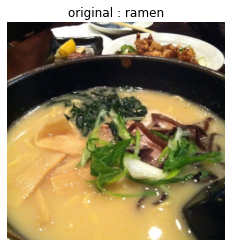

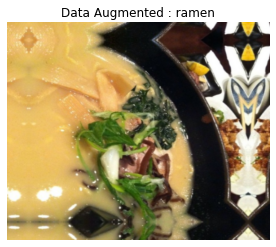

In [58]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
print(target_dir)
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"original : {target_class}")
plt.axis(False)

augmented_img = data_augmentation(tf.expand_dims(img, axis = 0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Data Augmented : {target_class}")
plt.axis(False)

In [60]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name = "input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name = "global_average_pooled_layer")(x)
outputs = layers.Dense(10, activation = "softmax", name = "output_layer")(x)
model_1 = keras.Model(inputs, outputs)

In [61]:
model_1.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [62]:
history_1_percent = model_1.fit(
    train_data_1_percent,
    epochs = 5,
    validation_data = test_data,
    callbacks = [create_tensorboard_callback("transfer_learning", "1_percent_data_augmentation")]
)

TensorBoard log 파일들은 transfer_learning/1_percent_data_augmentation/20211102-225513에 저장했습니다.
Epoch 1/5
3/3 [==============================] - 67s 31s/step - loss: 2.3060 - accuracy: 0.0571 - val_loss: 2.2659 - val_accuracy: 0.1464
Epoch 2/5
3/3 [==============================] - 59s 29s/step - loss: 2.0783 - accuracy: 0.2571 - val_loss: 2.1481 - val_accuracy: 0.2168
Epoch 3/5
3/3 [==============================] - 60s 30s/step - loss: 1.9329 - accuracy: 0.3857 - val_loss: 2.0354 - val_accuracy: 0.2980
Epoch 4/5
3/3 [==============================] - 59s 29s/step - loss: 1.7570 - accuracy: 0.4857 - val_loss: 1.9293 - val_accuracy: 0.3828
Epoch 5/5
3/3 [==============================] - 59s 29s/step - loss: 1.5555 - accuracy: 0.6714 - val_loss: 1.8366 - val_accuracy: 0.4572


In [63]:
model_1.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooled_layer  (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [64]:
result_1_percent_data_augmentation = model_1.evaluate(test_data)
result_1_percent_data_augmentation

79/79 [==============================] - 58s 730ms/step - loss: 1.8366 - accuracy: 0.4572


[1.836633563041687, 0.45719999074935913]

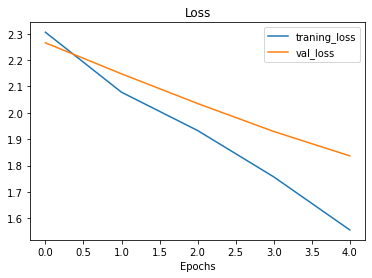

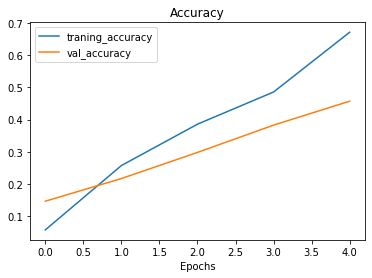

In [65]:
plot_loss_curves(history_1_percent)

In [66]:
# 10% 데이터만을만 학습!
# 1% 데이터로 augmentation!
# 이제 10% 데이터로 augmentation까지 하면 어떨까?

In [67]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [68]:
IMG_SIZE = (224, 224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir_10_percent,
    image_size = IMG_SIZE,
    label_mode = "categorical",
    batch_size = 32
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_dir,
    image_size = IMG_SIZE,
    label_mode = "categorical"
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [69]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescaling(1./255) 다른 모델에 대해서는... 
], name = "data_augmentation")

input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name = "input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name = "global_average_pooled_layer")(x)
outputs = layers.Dense(10, activation = "softmax", name = "output_layer")(x)
model_2 = keras.Model(inputs, outputs)

model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [70]:
checkpoint_path = "ten_percent_model_checkpoints_weight/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path,
    save_weight_only = True,
    save_best_only = False,
    save_freq = "epoch",
    verbose = 1
)

In [71]:
history_10percent_data_augmentation = model_2.fit(
    train_data_10_percent,
    epochs = 5,
    validation_data = test_data,
    callbacks = [
        create_tensorboard_callback("transfer_learning", "10_percent_data_augmentation"),
        checkpoint_callback
    ]
)

TensorBoard log 파일들은 transfer_learning/10_percent_data_augmentation/20211102-230118에 저장했습니다.
Epoch 1/5
24/24 [==============================] - 76s 3s/step - loss: 2.0057 - accuracy: 0.3587 - val_loss: 1.4936 - val_accuracy: 0.6448

Epoch 00001: saving model to ten_percent_model_checkpoints_weight\checkpoint.ckpt
INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weight\checkpoint.ckpt\assets


d:\Git\study\tensorflow_nlp\tensorflow_nlp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/5
24/24 [==============================] - 70s 3s/step - loss: 1.3559 - accuracy: 0.6680 - val_loss: 1.0640 - val_accuracy: 0.7556

Epoch 00002: saving model to ten_percent_model_checkpoints_weight\checkpoint.ckpt
INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weight\checkpoint.ckpt\assets


d:\Git\study\tensorflow_nlp\tensorflow_nlp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/5
24/24 [==============================] - 76s 3s/step - loss: 1.1082 - accuracy: 0.7187 - val_loss: 0.8761 - val_accuracy: 0.7856

Epoch 00003: saving model to ten_percent_model_checkpoints_weight\checkpoint.ckpt
INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weight\checkpoint.ckpt\assets


d:\Git\study\tensorflow_nlp\tensorflow_nlp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/5
24/24 [==============================] - 81s 3s/step - loss: 0.9076 - accuracy: 0.7787 - val_loss: 0.7694 - val_accuracy: 0.8052

Epoch 00004: saving model to ten_percent_model_checkpoints_weight\checkpoint.ckpt
INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weight\checkpoint.ckpt\assets


d:\Git\study\tensorflow_nlp\tensorflow_nlp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 5/5
24/24 [==============================] - 84s 4s/step - loss: 0.8079 - accuracy: 0.8000 - val_loss: 0.7032 - val_accuracy: 0.8108

Epoch 00005: saving model to ten_percent_model_checkpoints_weight\checkpoint.ckpt
INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weight\checkpoint.ckpt\assets


d:\Git\study\tensorflow_nlp\tensorflow_nlp\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [72]:
dx

NameError: name 'dx' is not defined